In [15]:
import wandb
import pandas as pd

api = wandb.Api()

def get_experiments(samples=500):
    runs = api.runs(
        path="arvind6902/language-skills",
        order='-created_at'
    )
    for run in runs:
        print(run.name)
    return runs

# def get_final_value(histories, key):
#     values = []
#     for history in histories:
#         values.append(history[key].iloc[-1])
#     return values

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import pandas as pd

orange = '#E48B10'
blue = '#42838F'
gray = '#808080'

SMALL = 11
MEDSMALL = 14
MEDIUM = 17
BIGGER = 22

plt.rc('font', size=BIGGER)         # Default
plt.rc('axes', titlesize=MEDIUM)    # Axes titles
plt.rc('axes', labelsize=MEDIUM)    # x and y labels
plt.rc('xtick', labelsize=SMALL)    # x tick labels
plt.rc('ytick', labelsize=SMALL)    # y tick labels
plt.rc('legend', fontsize=MEDSMALL) # Legend labels
plt.rc('figure', titlesize=BIGGER)  # Figure title

plt.rc('font', family='serif')
plt.rc('font', serif='Palatino')
plt.rc('figure', dpi=100)
plt.rc('text', usetex=False)

In [16]:
runs = get_experiments(samples=500)

plant_row_rnd_1716327155
apt_1716326495
plant_row_apt_1716326229
plant_row_rnd_1716324002
apt_1716323205
plant_row_apt_1716322946
plant_row_diayn_raw_1716322163
plant_row_dqn_1716321737
plant_row_rnd_1716320565
plant_row_diayn_raw_1716319990
apt_1716319682
plant_row_dqn_1716319629
plant_row_apt_1716319431
ellm_1716170614
ellm_1716170256
ellm_1716170781
plant_row_diayn_raw_1716317758
plant_row_dqn_1716317624
lunar_1h_1716317279
lunar_1h_1716317278
plant_row_rnd_1716317117
diayn_lang_aug_policy_1716316922
diayn_lang_aug_policy_1716316918
diayn_lang_aug_policy_1716316917
diayn_lang_aug_discrim_1716316379
diayn_lang_aug_discrim_1716316379
diayn_lang_aug_discrim_1716316379
diayn_lang_aug_discrim_1716316379
diayn_lang_aug_discrim_1716316379
apt_1716316184
plant_row_diayn_raw_1716315766
plant_row_dqn_1716315672
diayn_lang_1716314146
plant_row_diayn_lang_1716313947
plant_row_diayn_lang_1716313947
plant_row_diayn_lang_1716313947
plant_row_diayn_lang_1716313919
plant_row_diayn_lang_1716313916
pl

In [17]:
len(runs)

253

In [30]:
def filter_for_runs_with_prefix(runs, prefix, top_k=5):
    prefix += '_1'
    filtered = [r for r in runs if r.name.startswith(prefix)]
    filtered.sort(key=lambda r: int(r.name.split('_')[-1]), reverse=True)
    filtered = filtered[:top_k]
    print('{}: Got and filtered for {} runs'.format(prefix, len(filtered)))
    print([r.name for r in filtered])
    return filtered

def get_histories(runs):
    return [r.history(samples=500) for r in runs]

In [32]:
diayn_raw =             get_histories(filter_for_runs_with_prefix(runs, 'diayn_raw'))
diayn_lang =            get_histories(filter_for_runs_with_prefix(runs, 'diayn_lang'))
diayn_lang_hybrid =     get_histories(filter_for_runs_with_prefix(runs, 'diayn_lang_hybrid'))
dqn =                   get_histories(filter_for_runs_with_prefix(runs, 'dqn'))

diayn_raw_1: Got and filtered for 5 runs
['diayn_raw_1716197624', 'diayn_raw_1716193685', 'diayn_raw_1716190337', 'diayn_raw_1716187453', 'diayn_raw_1716184462']
diayn_lang_1: Got and filtered for 5 runs
['diayn_lang_1716314146', 'diayn_lang_1716287607', 'diayn_lang_1716261051', 'diayn_lang_1716228109', 'diayn_lang_1716228108']
diayn_lang_hybrid_1: Got and filtered for 5 runs
['diayn_lang_hybrid_1716230606', 'diayn_lang_hybrid_1716230599', 'diayn_lang_hybrid_1716230587', 'diayn_lang_hybrid_1716230580', 'diayn_lang_hybrid_1716230578']
dqn_1: Got and filtered for 5 runs
['dqn_1716197109', 'dqn_1716193584', 'dqn_1716190299', 'dqn_1716187256', 'dqn_1716184247']


In [34]:
ellm =                  get_histories(filter_for_runs_with_prefix(runs, 'ellm'))
rnd =                   get_histories(filter_for_runs_with_prefix(runs, 'rnd'))

ellm_1: Got and filtered for 3 runs
['ellm_1716170781', 'ellm_1716170614', 'ellm_1716170256']
rnd_1: Got and filtered for 5 runs
['rnd_1716248588', 'rnd_1716246280', 'rnd_1716243867', 'rnd_1716241652', 'rnd_1716239066']


In [41]:
apt =                   get_histories(filter_for_runs_with_prefix(runs, 'apt'))

apt_1: Got and filtered for 4 runs
['apt_1716326495', 'apt_1716323205', 'apt_1716319682', 'apt_1716316184']


In [48]:
def get_values(runs, metric):
    values = [run[metric] for run in runs]
    df = pd.concat(values, axis=1)
    df = df.fillna(0)
    means = df.mean(axis=1)
    stds = df.std(axis=1)
    return means, stds

In [52]:
raw_means, raw_stds = get_values(diayn_raw, 'score/crafter')
lang_means, lang_stds = get_values(diayn_lang, 'score/crafter')
hybrid_means, hybrid_stds = get_values(diayn_lang_hybrid, 'score/crafter')
dqn_means, dqn_stds = get_values(dqn, 'score/crafter')
# ellm_means, ellm_stds = get_values(ellm, 'score/crafter')
rnd_means, rnd_stds = get_values(rnd, 'score/crafter')
apt_means, apt_stds = get_values(apt, 'score/crafter')

findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following 

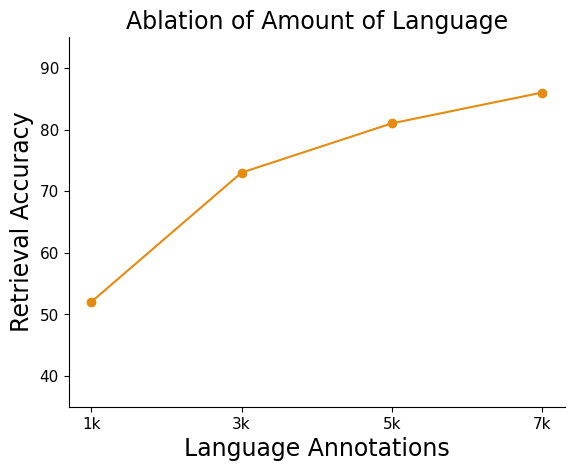

In [62]:
def gen_plot():
    plt.figure()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    random = list(reversed([86, 81, 73, 52]))
    x = ['1k', '3k', '5k', '7k']

    p = plt.plot([], [], c=orange, label='ours')
    plt.plot(x, random, c=p[0].get_color(), zorder=-1)
    plt.scatter(x, random, c=p[0].get_color(), zorder=1)


    plt.xlabel('Language Annotations')
    plt.ylabel('Retrieval Accuracy')
    plt.title("Ablation of Amount of Language")
    #plt.legend()7e3, 5e3, 3e3, 1e3
    plt.ylim(35,95)

    plt.show()
    
gen_plot()